<a href="https://colab.research.google.com/github/Mikaner/reinforcement/blob/main/Sarsa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

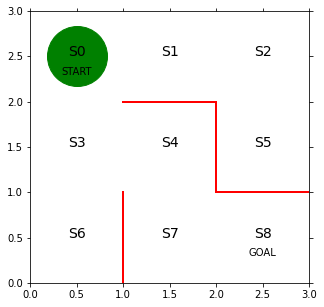

In [6]:
fig = plt.figure(figsize=(5,5))
ax = plt.gca()

# draw red wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# 状態を示す文字S0~S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# 描画範囲の設定と目盛りを消す設定
ax.set_xlim(0,3)
ax.set_ylim(0,3)
plt.tick_params(axis='both', which='both', bottom='off', top='off',
               labelbottom='off', right='off', left='off', labelleft='off')

# draw green circle for S0
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

In [7]:
# 初期の方策を決定するパラメータtheta_0を設定

# 行は状態0~7, 列は移動方向で↑，→，↓，←を指す
theta_0 = np.array([[np.nan,      1,      1, np.nan], # S0
                    [np.nan,      1, np.nan,      1], # S1
                    [np.nan, np.nan,      1,      1], # S2
                    [     1,      1,      1, np.nan], # S3
                    [np.nan, np.nan,      1,      1], # S4
                    [     1, np.nan, np.nan, np.nan], # S5
                    [     1, np.nan, np.nan, np.nan], # S6
                    [     1,      1, np.nan, np.nan], # S7 ※S8はゴールなので方策なし
                    ])


In [8]:
[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0
Q

array([[       nan, 0.51094665, 0.85234282,        nan],
       [       nan, 0.89629887,        nan, 0.02874296],
       [       nan,        nan, 0.52362227, 0.76648041],
       [0.18563757, 0.79200775, 0.51755466,        nan],
       [       nan,        nan, 0.53865864, 0.87727382],
       [0.61713138,        nan,        nan,        nan],
       [0.19072962,        nan,        nan,        nan],
       [0.51962332, 0.57339373,        nan,        nan]])

In [9]:
def simple_convert_into_pi_from_theta(theta):
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        print(np.nansum(theta[i, :]))
    pi = np.nan_to_num(pi)

    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

2.0
2.0
2.0
3.0
2.0
1.0
1.0
2.0


In [10]:
# ε-greedy法

def get_action(s, Q, epsilon, pi_0):
    direction = ['up', 'right', 'down', 'left']

    # 行動決定
    if np.random.rand() < epsilon:
        # εの確率でランダムに動く
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Qの最大値の行動を採用する
        next_direction = direction[np.nanargmax(Q[s, :])]

    # 行動をindexへ
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3

    return action

def get_s_next(s, a, Q, epsilon, pi_0):
    # Qとepsilonとpiはいるのか？
    direction = ['up', 'right', 'down', 'left']
    next_direction = direction[a]

    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1

    return s_next

In [11]:
def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])

    return Q

In [12]:
def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0 # start
    a = a_next = get_action(s, Q, epsilon, pi) # 初期の行動
    s_a_history = [[0, np.nan]]

    while 1:
        a = a_next

        s_a_history[-1][1] = a

        s_next = get_s_next(s, a, Q, epsilon, pi)

        s_a_history.append([s_next, np.nan])

        if s_next == 8:
            r = 1
            a_next = np.nan
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
        
        # 価値関数を更新
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)

        # 終了判定
        if s_next == 8:
            break
        else:
            s = s_next
    
    return [s_a_history, Q]

In [13]:
eta = 0.1     # 学習率
gamma = 0.9   # 時間割引率
epsilon = 0.5 # ε-greedy法のランダムを選ぶ比率
v = np.nanmax(Q, axis=1) # 状態ごとに価値の最大値を決める
is_continue = True
episode = 1

while is_continue:
    print("Episode :", episode)

    epsilon = epsilon / 2

    # Sarsaで迷路を解き、移動した履歴と更新したQを決める
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)

    # 状態価値の変化
    new_v = np.nanmax(Q, axis=1) # 状態ごとに価値の最大値を決める
    print(np.sum(np.abs(new_v - v))) # 状態価値の変化を出力
    v = new_v

    print("Steps :", len(s_a_history))

    episode = episode + 1
    if episode > 100:
        break

Episode : 1
0.236132120012015
Steps : 17
Episode : 2
0.4175392166433227
Steps : 39
Episode : 3
0.31109480615348895
Steps : 35
Episode : 4
0.13359190862894488
Steps : 19
Episode : 5
0.06810117464961551
Steps : 5
Episode : 6
0.06330666752786407
Steps : 5
Episode : 7
0.05848466044134104
Steps : 5
Episode : 8
0.05369873297292316
Steps : 5
Episode : 9
0.05089806203935077
Steps : 5
Episode : 10
0.04861028485960228
Steps : 5
Episode : 11
0.04630871380386414
Steps : 5
Episode : 12
0.04400183493155596
Steps : 5
Episode : 13
0.041699628813404166
Steps : 5
Episode : 14
0.03941274751657575
Steps : 5
Episode : 15
0.0371518985602306
Steps : 5
Episode : 16
0.034927395607564304
Steps : 5
Episode : 17
0.03274884247837151
Steps : 5
Episode : 18
0.030624922825381873
Steps : 5
Episode : 19
0.02856327267277936
Steps : 5
Episode : 20
0.026570417099458177
Steps : 5
Episode : 21
0.024651755777095885
Steps : 5
Episode : 22
0.02281158494226998
Steps : 5
Episode : 23
0.02225579490698948
Steps : 5
Episode : 24
0.

In [14]:
print("            up    ,    right  ,     down  ,     left  ")
Q

            up    ,    right  ,     down  ,     left  


array([[       nan, 0.54051888, 0.72663127,        nan],
       [       nan, 0.74173697,        nan, 0.10008613],
       [       nan,        nan, 0.52680187, 0.66400505],
       [0.28944817, 0.80933659, 0.51755466,        nan],
       [       nan,        nan, 0.89987709, 0.54075012],
       [0.62429097,        nan,        nan,        nan],
       [0.19072962,        nan,        nan,        nan],
       [0.51962332, 0.99998867,        nan,        nan]])

In [15]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line, )

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)
HTML(anim.to_jshtml())